<a href="https://colab.research.google.com/github/hjshah142/TimeSeriesForecasting/blob/main/TimeSeriesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis & Forecasting in Python using Darts Library

https://pypi.org/project/darts/

In [1]:
!pip install darts

     |████████████████████████████████| 326 kB 4.1 MB/s 
     |████████████████████████████████| 1.4 MB 45.7 MB/s 
     |████████████████████████████████| 172 kB 60.6 MB/s 
     |████████████████████████████████| 65 kB 3.8 MB/s 
     |████████████████████████████████| 792 kB 40.1 MB/s 
     |████████████████████████████████| 9.8 MB 52.1 MB/s 
     |████████████████████████████████| 11.2 MB 9.7 MB/s 
     |████████████████████████████████| 380 kB 50.8 MB/s 
     |████████████████████████████████| 895 kB 51.5 MB/s 
     |████████████████████████████████| 49 kB 5.2 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6638394 sha256=670d169d196ba29f0ac96bc2087dc9cf9b924d32d88f9be8eb6d2bec00cdc3e3
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 

## Importing the Airpessenger datasets

In [5]:
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset

In [8]:
AirPessenger_series =AirPassengersDataset().load().pd_series()

In [11]:
AirPessenger_series.head()

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
Freq: MS, dtype: float64

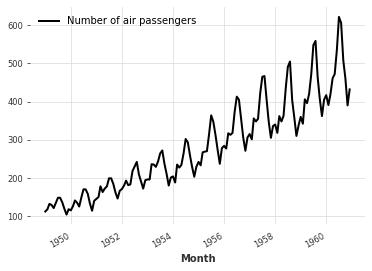

In [12]:
import matplotlib.pyplot as plt
series_air = AirPassengersDataset().load()
series_air.plot(label='Number of air passengers')
plt.legend();

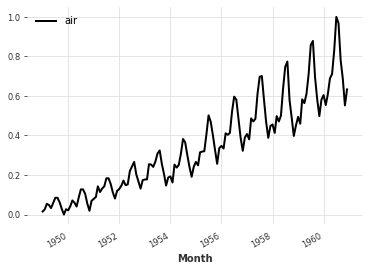

In [14]:
from darts.dataprocessing.transformers import Scaler
scaler_air = Scaler()
series_air_scaled = scaler_air.fit_transform(series_air)
series_air_scaled.plot(label='air')
plt.legend();

In [17]:
series_air_scaled

<TimeSeries (DataArray) (Month: 144, component: 1, sample: 1)>
array([[[0.01544402]],

       [[0.02702703]],

       [[0.05405405]],

       [[0.04826255]],

       [[0.03281853]],

       [[0.05984556]],

       [[0.08494208]],

       [[0.08494208]],

       [[0.06177606]],

       [[0.02895753]],

...

       [[0.60810811]],

       [[0.68918919]],

       [[0.71042471]],

       [[0.83204633]],

       [[1.        ]],

       [[0.96911197]],

       [[0.77992278]],

       [[0.68918919]],

       [[0.55212355]],

       [[0.63320463]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1960-12-01
  * component  (component) object '#Passengers'
Dimensions without coordinates: sample

In [18]:
# Train And Validation Split
train_air, val_air = series_air_scaled[:-36], series_air_scaled[-36:]

## Importing models for time series forecasting

In [21]:
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape

## Training of NBEATSMODEL 

In [22]:
model_air_milk = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=0)

In [25]:
model_air_milk.fit([train_air], verbose=True)

[2022-02-15 17:21:51,504] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 73 samples.
[2022-02-15 17:21:51,504] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 73 samples.
  1%|          | 1/100 [00:00<01:00,  1.64it/s]

 11%|█         | 11/100 [00:07<00:55,  1.60it/s]

 21%|██        | 21/100 [00:13<00:56,  1.40it/s]

 31%|███       | 31/100 [00:19<00:45,  1.52it/s]

 41%|████      | 41/100 [00:26<00:40,  1.46it/s]

 51%|█████     | 51/100 [00:33<00:33,  1.46it/s]

 61%|██████    | 61/100 [00:40<00:26,  1.46it/s]

 71%|███████   | 71/100 [00:47<00:19,  1.48it/s]

 81%|████████  | 81/100 [00:54<00:12,  1.54it/s]

 91%|█████████ | 91/100 [01:00<00:06,  1.46it/s]

100%|██████████| 100/100 [01:07<00:00,  1.49it/s]


## Predicting/Forecasting number of Airpessenger for the next 36 months

MAPE = 8.24%


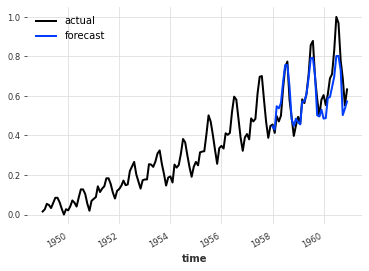

In [26]:
pred = model_air_milk.predict(n=36, series=train_air)

series_air_scaled.plot(label='actual')
pred.plot(label='forecast')
plt.legend();
print('MAPE = {:.2f}%'.format(mape(series_air_scaled, pred)))